# PyTorch Basics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy

In [2]:
torch.__version__

'1.6.0'

## Tensors

Construct a 3x5 matrix, uninitialized:

In [3]:
# Sets the default floating point dtype. 
# This type will be used as default floating point type for type inference in torch.tensor().
torch.set_default_tensor_type('torch.FloatTensor') 

In [5]:
x = torch.empty(3,5)
print(x)

tensor([[ 0.0000e+00, -2.0000e+00,  0.0000e+00, -2.0000e+00,  1.5414e-44],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [6]:
print(x.type())

torch.FloatTensor


Initialize a double tensor randomized with a normal distribution with mean=0, var=1:

In [7]:
x = torch.randn(3, 5, dtype=torch.double)
print(x)
print(x.size())

tensor([[ 0.0238, -0.0038,  0.8514,  0.0019, -0.1243],
        [ 1.0194,  0.8329,  1.2835,  1.0102,  0.5829],
        [ 0.9645, -0.4587, -0.7779,  0.4342,  1.4593]], dtype=torch.float64)
torch.Size([3, 5])


In [8]:
print(x.size()[0])
print(x.size()[1])
print(x.size() == (3,5))

3
5
True


Importance of the brackets when defining a tensor

In [16]:
a = torch.tensor([2.0])
print(type(a))
print(a.dtype)
print(a.size())

b = torch.tensor(2.0)
print(type(b))
print(b.dtype)
print(b.size())

<class 'torch.Tensor'>
torch.float32
torch.Size([1])
<class 'torch.Tensor'>
torch.float32
torch.Size([])


Select some columns

In [9]:
cols = torch.zeros(5, dtype=torch.bool)
print(cols)
cols[1] = True
cols[4] = True
print(cols)
c = x[:, cols]  # selects all rows, 4th column and  5th column from a
print(c)

tensor([False, False, False, False, False])
tensor([False,  True, False, False,  True])
tensor([[-0.0038, -0.1243],
        [ 0.8329,  0.5829],
        [-0.4587,  1.4593]], dtype=torch.float64)


All operations on the tensor that operate in-place on it will have an _ postfix. 

In [20]:
# x will be filled with the value 3.5
x.fill_(3.5)
print(x)

tensor([[3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000]], dtype=torch.float64)


Torch & Numpy conversions

In [23]:
import numpy as np
y = x.numpy()
print(y)

[[3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]]


In [24]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [25]:
xr = torch.randn(3, 5)
a = np.ones(5).astype(int)
b = torch.from_numpy(a)
print(xr)
print(b)
print(a.dtype) # Array or tensor data type
print(b.dtype)
print(xr.dtype)

tensor([[ 0.0701, -0.2595, -1.8817,  0.0131,  1.7632],
        [ 0.7533, -1.2207, -0.4117, -0.1789, -0.1392],
        [-0.9893,  0.5541, -1.3366, -0.9089,  0.4074]])
tensor([1, 1, 1, 1, 1])
int64
torch.int64
torch.float32


## Operations - Tensors

In [31]:
#Addition

x = torch.rand(5, 3) 
y = torch.rand(5, 3)
print(x + y)
#OR
print(torch.add(x, y))
#OR
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.1009, 1.0584, 1.4767],
        [0.4774, 0.9547, 1.5444],
        [0.7884, 1.0477, 0.8053],
        [1.2928, 1.2144, 1.0286],
        [0.5520, 0.9339, 1.6059]])
tensor([[1.1009, 1.0584, 1.4767],
        [0.4774, 0.9547, 1.5444],
        [0.7884, 1.0477, 0.8053],
        [1.2928, 1.2144, 1.0286],
        [0.5520, 0.9339, 1.6059]])
tensor([[1.1009, 1.0584, 1.4767],
        [0.4774, 0.9547, 1.5444],
        [0.7884, 1.0477, 0.8053],
        [1.2928, 1.2144, 1.0286],
        [0.5520, 0.9339, 1.6059]])


In [32]:
#Addition: in-place

# adds x to y
y.add_(x)
print(y)

tensor([[1.1009, 1.0584, 1.4767],
        [0.4774, 0.9547, 1.5444],
        [0.7884, 1.0477, 0.8053],
        [1.2928, 1.2144, 1.0286],
        [0.5520, 0.9339, 1.6059]])


In [33]:
print(x.t())
print(x)
print(x[:, 1])

tensor([[0.4973, 0.3622, 0.0279, 0.3841, 0.1750],
        [0.7092, 0.2163, 0.4560, 0.9153, 0.5650],
        [0.6129, 0.7086, 0.7674, 0.8668, 0.6114]])
tensor([[0.4973, 0.7092, 0.6129],
        [0.3622, 0.2163, 0.7086],
        [0.0279, 0.4560, 0.7674],
        [0.3841, 0.9153, 0.8668],
        [0.1750, 0.5650, 0.6114]])
tensor([0.7092, 0.2163, 0.4560, 0.9153, 0.5650])


In [34]:
#resizing a tensor

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [35]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.6595])
-0.6594548225402832


## 3D Tensors

In [36]:
y = torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
print(y)
print(y.shape)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
torch.Size([3, 2, 3])


In [37]:
torch.sum(y, dim=0)

tensor([[ 3,  6,  9],
        [12, 15, 18]])

## PyTorch Broadcasting semantics

In [39]:
# can line up trailing dimensions to make reading easier
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())

torch.Size([5, 3, 4, 1])


In [40]:
# but not necessary:
x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([3, 1, 7])


In [41]:
#The following command doesnt work tough
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [42]:
x=2*torch.ones(  2,4)
y=torch.ones(3,2,4)
print(x+y)

tensor([[[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]]])


In [43]:
#What is the diffence between "x = xr" and "x = xr.clone()"?
x = xr.clone()
x.add_(-xr)
print(x)
print(xr)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[ 0.0701, -0.2595, -1.8817,  0.0131,  1.7632],
        [ 0.7533, -1.2207, -0.4117, -0.1789, -0.1392],
        [-0.9893,  0.5541, -1.3366, -0.9089,  0.4074]])


In [44]:
#Also be careful, changing the torch tensor modify the numpy array and vice-versa...
y=torch.ones(2,4)
print(y)
z = y.numpy()
print(z)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [45]:
np.add(z, 1, out=z)
print("z=", z)
print("y=", y,"\n")
torch.add(y, -4, out=y)
print("z=",z)
print("y=",y)

z= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y= tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]]) 

z= [[-2. -2. -2. -2.]
 [-2. -2. -2. -2.]]
y= tensor([[-2., -2., -2., -2.],
        [-2., -2., -2., -2.]])


## Computational graphs

import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [11]:
!pip install torchviz

     |████████████████████████████████| 41 kB 195 kB/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.1-py3-none-any.whl size=3521 sha256=6e43381ad723280ed0aacd799b43a816233b32f64d10b4612fabcf46b29f2a6a
  Stored in directory: /Users/dabasn/Library/Caches/pip/wheels/10/7b/c8/3af79ec02e294a832c01037bcb38302bbcee0bb020dcbbbd3e
Successfully built torchviz


In [14]:
import torchviz

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[0.1335]], requires_grad=True)
tensor([[2.1335, 2.1335],
        [2.1335, 2.1335]], grad_fn=<AddBackward0>)


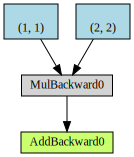

In [19]:
x = torch.ones(2, 2, requires_grad=True)
w = torch.rand(1, 1, requires_grad=True)
print(x)
print(w)
y = w * x + 2
print(y)
torchviz.make_dot(y)

## Pyorch: linear regression

In [20]:
#plotting the surface
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    # Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

In [21]:
#generating the 2D points
w_source = torch.tensor([2., -3.], dtype=torch.float).view(-1,1)
b_source  = torch.tensor([1.], dtype=torch.float)

x = torch.empty(30, 2).uniform_(0, 1) # input of the regression model

print(x.shape)
print(w_source.shape)
print(b_source.shape)

y = torch.matmul(x,w_source)+b_source # output of the regression model
print(y.shape)

torch.Size([30, 2])
torch.Size([2, 1])
torch.Size([1])
torch.Size([30, 1])


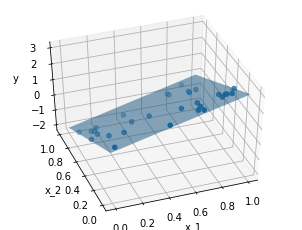

In [22]:
#plot the dataset
plot_views(x.numpy(), y.numpy(), w_source.numpy(), b_source.numpy())

In [23]:
# randomly initialize learnable weights and bias
w_t_init = torch.empty(2, 1).uniform_(-1, 1) 
b_t_init = torch.empty(1, 1).uniform_(-1, 1)

print("Initial values of the parameters:")
print(w_t_init) 
print(b_t_init)

Initial values of the parameters:
tensor([[-0.3215],
        [ 0.6349]])
tensor([[0.1253]])


### Optimization/model performance metrics

In [24]:
#calculate the gradient of the loss

# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()

## Pyorch: gradient descent algorithm

In [26]:
learning_rate = 1e-2

w_t = w_t_init.clone()
b_t = b_t_init.clone()

for epoch in range(200):
    l = loss_t(x,y)
    grad_w, grad_b = gradient_t(x,y)
    w_t = w_t-learning_rate*grad_w
    b_t = b_t-learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l)

progress: epoch: 0 loss tensor(60.8962)
progress: epoch: 1 loss tensor(45.3628)
progress: epoch: 2 loss tensor(39.9721)
progress: epoch: 3 loss tensor(35.3277)
progress: epoch: 4 loss tensor(31.2588)
progress: epoch: 5 loss tensor(27.6916)
progress: epoch: 6 loss tensor(24.5626)
progress: epoch: 7 loss tensor(21.8164)
progress: epoch: 8 loss tensor(19.4046)
progress: epoch: 9 loss tensor(17.2851)
progress: epoch: 10 loss tensor(15.4210)
progress: epoch: 11 loss tensor(13.7803)
progress: epoch: 12 loss tensor(12.3350)
progress: epoch: 13 loss tensor(11.0607)
progress: epoch: 14 loss tensor(9.9360)
progress: epoch: 15 loss tensor(8.9424)
progress: epoch: 16 loss tensor(8.0636)
progress: epoch: 17 loss tensor(7.2855)
progress: epoch: 18 loss tensor(6.5956)
progress: epoch: 19 loss tensor(5.9831)
progress: epoch: 20 loss tensor(5.4386)
progress: epoch: 21 loss tensor(4.9539)
progress: epoch: 22 loss tensor(4.5217)
progress: epoch: 23 loss tensor(4.1358)
progress: epoch: 24 loss tensor(3.79

In [27]:
# After training
print("Estimation of the parameters:")
print(w_t)
print(b_t)

Estimation of the parameters:
tensor([[ 2.0079],
        [-2.9833]])
tensor([[0.9879]])
